<a href="https://colab.research.google.com/github/Piaozan/29CM/blob/main/2_%E6%95%B0%E6%8D%AE%E6%8E%A2%E7%B4%A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import & read file

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime

import warnings
warnings.filterwarnings(action='ignore')

sns.set_palette("RdBu")

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [2]:
from google.colab import files
from google.colab import drive
drive.mount("/content/gdrive")

total = pd.read_csv('/content/gdrive/MyDrive/final/data/commerce/commerce.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# 数据探索

## (1) 基础信息

In [ ]:
total.head(2)

,session_id,event_timestamp,event_name,user_no,item_no,device_type,mobile_brand_name,mobile_model_name,mobile_marketing_name,operating_system_version,country,region,platform,item_name,image_name,price,category1_code,category1_name,category2_code,category2_name,category3_code,category3_name,brand_no,brand_name,birth_date,gender
0,c47e93742387750baba2e238558fa12d,2021-06-03 13:00:01.845,click_item,+9eODQMZ8YgXQZJJAo56nw==,4KwsZkXDulM0oQ2sTVSlYQ==,mobile,Samsung,SM-N960N,Galaxy Note9,Android 10,South Korea,Gyeonggi-do,ANDROID,남성) 코튼 리넨 이지 쇼츠,ecb06f34b6d8c4c521221aebbcc0e934,29900.0,243100100,의류,243104100,하의,243104101,바지,13901.0,TOPTEN,1969-04-05,F
1,f482aba7e1b76564c5404d96650f0dbd,2021-06-03 13:00:01.920001,add_to_cart,qik2Oa/1SQAjHeR64GLY0g==,+3vED/NUxtVk4Dvc0QUahA==,mobile,Samsung,SM-G977N,Galaxy S10 5G,Android 11,South Korea,Seoul,ANDROID,Puppy's delight short sleeve T-shirts white,9911a0e7dc8296f2fdccebb3bbbfa615,38000.0,243100100,의류,243102100,상의,243102103,티셔츠,7604.0,Wave union,1989-02-22,F


In [ ]:
# 缺失值探索
total.isnull().sum()

session_id                        0
event_timestamp                   0
event_name                        0
user_no                           0
item_no                           0
device_type                       0
mobile_brand_name              3594
mobile_model_name              3594
mobile_marketing_name       4250941
operating_system_version          0
country                          12
region                         2195
platform                          0
item_name                         0
image_name                        0
price                             0
category1_code                    0
category1_name                    0
category2_code                    0
category2_name                    0
category3_code                    0
category3_name                    0
brand_no                        171
brand_name                      209
birth_date                   296901
gender                       664253
dtype: int64

- mobile_brand_name, mobile_model_name 具有相同缺失值
- mobile_marketing_name 由于苹果保护用户隐私问题导致的缺失值
- birth_date, gender 具有大量的缺失值
- 所有缺失值随后将会处理

In [ ]:
# info
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880407 entries, 0 to 5880406
Data columns (total 26 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   session_id                object 
 1   event_timestamp           object 
 2   event_name                object 
 3   user_no                   object 
 4   item_no                   object 
 5   device_type               object 
 6   mobile_brand_name         object 
 7   mobile_model_name         object 
 8   mobile_marketing_name     object 
 9   operating_system_version  object 
 10  country                   object 
 11  region                    object 
 12  platform                  object 
 13  item_name                 object 
 14  image_name                object 
 15  price                     float64
 16  category1_code            int64  
 17  category1_name            object 
 18  category2_code            int64  
 19  category2_name            object 
 20  category3_code          

- event_timestamp, birth_date 为时间, 需要改成datetime的形式

In [ ]:
total.describe()

,price,category1_code,category2_code,category3_code,brand_no
count,5.880407e+06,5.880407e+06,5.880407e+06,5.880407e+06,5.880236e+06
mean,9.465186e+04,2.442333e+08,2.442026e+08,2.442026e+08,7.254326e+03
std,1.169249e+05,2.390334e+06,2.278878e+06,2.278884e+06,4.307777e+03
min,0.000000e+00,2.341001e+08,2.341051e+08,2.341051e+08,4.410000e+02
25%,3.970000e+04,2.431001e+08,2.431021e+08,2.431021e+08,3.268000e+03
50%,6.900000e+04,2.431001e+08,2.431041e+08,2.431041e+08,6.513000e+03
75%,1.190000e+05,2.441001e+08,2.441021e+08,2.441021e+08,1.135900e+04
max,1.429800e+07,2.671001e+08,2.591031e+08,2.591031e+08,1.573700e+04


## (2) Feature 分类

- 数值型: price
- 分类型: event_name, device_type, country, platform, item_name, category1_name, brand_name, gender ......
- 时序型: event_timestamp, birth_date

### 用户

In [ ]:
print('总用户数: ',total['user_no'].nunique())
print('购买用户数:', total[total['event_name'] == 'purchase_success']['user_no'].nunique())
print('非购买用户数: ', total['user_no'].nunique() - total[total['event_name'] == 'purchase_success']['user_no'].nunique())

总用户数:  254958
购买用户数: 146904
非购买用户数:  108054


### 商品

In [ ]:
print('总商品数: ', total['item_no'].nunique())
print('被购买的商品数:', total[total['event_name'] == 'purchase_success']['item_no'].nunique())
print('未被购买的商品数: ', total['item_no'].nunique() - total[total['event_name'] == 'purchase_success']['item_no'].nunique())

总商品数:  283326
被购买的商品数: 69498
未被购买的商品数:  213828


### 行为分类 -> 分类型

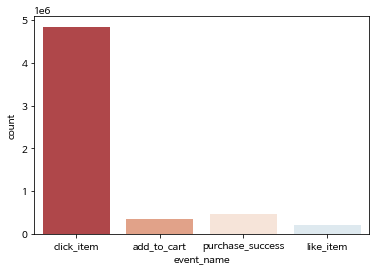

In [ ]:
f,ax = plt.subplots(1,1)
sns.countplot('event_name', data=total)
plt.show()

- 具有大量点击数，随后是支付、购物车、收藏
- 以AARRR漏斗模型考虑，一般购买行为将会是最低的，可是本数据的支付行为多于购物车或者收藏
- 因此，本数据对此有可能存在一些问题。

### platform（渠道） -> 分类型

In [5]:
round(total['platform'].value_counts(normalize=True) * 100, 2)

IOS        72.13
ANDROID    27.87
Name: platform, dtype: float64

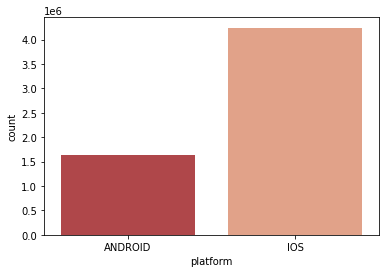

In [3]:
f,ax = plt.subplots(1,1)
sns.countplot(x='platform', data=total)
plt.show()

- 苹果用户 : 安卓用户 = 7:3

In [4]:
# 渠道与行为结合
total.groupby(['platform','event_name'])['event_name'].count()

platform  event_name      
ANDROID   add_to_cart          353143
          click_item           956858
          like_item            216320
          purchase_success     112680
IOS       click_item          3888833
          purchase_success     352573
Name: event_name, dtype: int64

- 可知，苹果用户数据没有购物车&收藏这个行为
- 然而，该电商的70%的用户都为苹果用户
- 因此，本分析首先排除购物车以及收藏这个行为的分析，只关注点击与支付该行为

### 商品分类(第一阶段) -> 分类型

In [8]:
# 把商品分类的韩文改成中文
total['category1_name'] = total['category1_name'].map({'의류':'服装', 
                                                       '잡화':'杂货',
                                                       '생활/건강':'生活/健康',
                                                       '가구/인테리어':'家居',
                                                       '디지털/가전':'数码/家电',
                                                       '화장품/미용':'化妆品/美容',
                                                       '식품':'食品',
                                                       '스포츠/레저':'运动/休闲',
                                                       '컬처':'文化',
                                                       '키즈':'儿童',
                                                       '반려동물':'家畜',
                                                       '성년의날':'成人节'})

In [9]:
round(total['category1_name'].value_counts(normalize=True) * 100, 2)

服装        60.65
杂货        25.15
生活/健康      4.49
家居         3.59
数码/家电      2.33
化妆品/美容     1.26
食品         0.81
运动/休闲      0.75
文化         0.56
儿童         0.19
家畜         0.16
成人节        0.06
Name: category1_name, dtype: float64

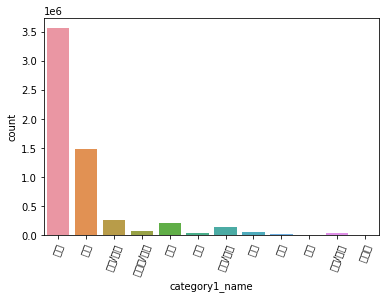

In [11]:
f,ax = plt.subplots(1,1)
sns.countplot(x='category1_name', data=total)
plt.xticks(rotation=70)
plt.show()

- 可知，服装与杂货类的商品占总用户行为的85%以上

In [12]:
round(total[total['event_name'] == 'purchase_success']['category1_name'].value_counts(normalize=True) * 100, 2).head(5)

服装       50.26
杂货       24.98
生活/健康     7.33
家居        4.04
数码/家电     3.85
Name: category1_name, dtype: float64

- 购买行为包含75%以上

### 性别 -> 分类型

In [13]:
# 男女性别用户的行为占比
round(total['gender'].value_counts(normalize=True) * 100, 2)

F    83.9
M    16.1
Name: gender, dtype: float64

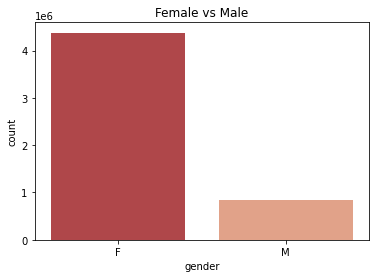

In [15]:
f,ax = plt.subplots(1,1)
sns.countplot(x='gender', data=total)
ax.set_title('Female vs Male')
plt.show()

- 29CM的主要用户为女性，男女行为比例为2：8

### 年龄

- 通过数据里的出生日期，转换为年龄'age'
- 由于数据为2021年 6-8月的数据，因此假设现在为2021年，并计算年龄

In [16]:
# 出生日期
total['birth_date'] = pd.to_datetime(total['birth_date'], errors = 'coerce')

# 计算年龄
total['age'] = 2021 - total['birth_date'].dt.year

<Axes: xlabel='age', ylabel='Density'>

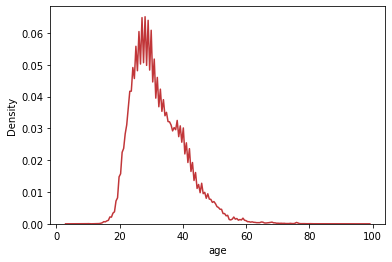

In [18]:
# 年龄分布
sns.kdeplot(x='age', data=total)

- 确认年龄分布的结果，根据年龄不同，用户行为数差异很大，因此按年龄作为标准进行分类

In [20]:
# 年龄分类 （以十岁为单位进行分类）
total['年龄分类'] = np.where(total['age'] < 10, '0-9', # 0-9岁
                        np.where(total['age'] < 20, '10', #10来岁
                        np.where(total['age'] < 30, '20', #20来岁
                        np.where(total['age'] < 40, '30', #30来岁
                        np.where(total['age'] < 50, '40', #40来岁
                        np.where(total['age'] < 60, '50', #50来岁
                        np.where(total['age'] < 70, '60', #60来岁
                        np.where(total['age'] < 80, '70', #70来岁
                        np.where(total['age'] < 90, '80','90'))))))))) #80-90来岁

In [21]:
# 根据年龄分类，行为差异
round(total['年龄分类'].value_counts(normalize=True) * 100, 2)

20     40.53
30     34.96
40     14.17
90      5.71
50      2.77
10      1.29
60      0.44
70      0.12
80      0.01
0-9     0.00
Name: 年龄分类, dtype: float64

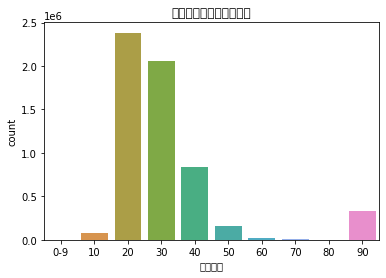

In [22]:
f,ax = plt.subplots(1,1)
sns.countplot(x='年龄分类', data=total,order=['0-9','10','20','30','40','50','60','70','80','90'])
ax.set_title('年龄分类用户的行为占比')
plt.show()

- 20、30、40多岁人群是29CM的主要顾客群。
- 0-9岁、70多岁、80多岁真的是自己购买的吗?
- 90多岁人群占总数的5.7%,很有可能是用户的输入错误,因此今后需要处理。

- 确认各年龄段是否有商品种类及品牌等偏好，以年龄段为基准来判断是否正确。
- 下面的图表按年龄段列出了行动最多的三个类别。
- 年龄段除有异常的90多岁人群外,以TOP4 20-50多岁人群为标准进行划分。

### event_timestamp （行为时间）

In [31]:
# event_timestamp => 转换为 datetime
total['event_timestamp'] = pd.to_datetime(total['event_timestamp'], errors = 'coerce')

# event_year所有都为2021年，删除
# 根据event_timestamp 生成新的时间
total['event_month'] = total['event_timestamp'].dt.month
total['event_day'] = total['event_timestamp'].dt.day
total['event_weekday'] = total['event_timestamp'].dt.dayofweek
total['event_hour'] = total['event_timestamp'].dt.hour
total['event_minute'] = total['event_timestamp'].dt.minute
total['event_timestamp'] = total['event_timestamp'].dt.date

In [32]:
# object -> datetime
total['event_timestamp'] = pd.to_datetime(total['event_timestamp'])

# 日期 (6.6 ~ 7.31)
total = total[(total['event_timestamp'] >= '2021-06-06') & (total['event_timestamp'] <= '2021-07-31')]

- 本数据为全期21.06.03~21.08.04（9周），但数据未分为准确月份。
- 因此，我们试图以2个月的时间作为21.06.06至21.07.31（8周）期间的数据进行数据分析。

### 渠道与性别 / 渠道与年龄

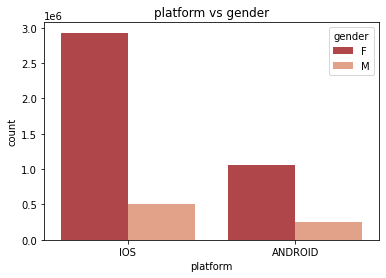

In [34]:
f,ax = plt.subplots(1,1)
sns.countplot(x='platform', hue='gender', data=total)
ax.set_title('platform vs gender')
plt.show()

- 29CM主要用户：女性使用苹果的频率很高

- 如前所述,90多岁的年龄段是存在错误的数据,如果预测这些数据并将其更改为其他值,个人身份的信息非常少,因此转换时会对整体数据产生很大的影响。
- **因此,本分析将更加留意20~50多岁人群的行为模式（除了90多岁人群之外,几乎占全部人群）**

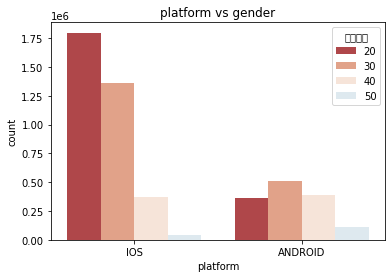

In [38]:
# 只取出20-50多岁
age_total = total[((total['年龄分类'] == '20') | 
                   (total['年龄分类'] == '30') |
                   (total['年龄分类'] == '40') |
                   (total['年龄分类'] == '50'))]

# 可视化
f,ax = plt.subplots(1,1)
sns.countplot(x='platform', hue='年龄分类', data=age_total)
ax.set_title('platform vs gender')
plt.show()

- 20-30岁年龄段的苹果使用者非常多
- 相反,安卓在20-40岁年龄段的差异并不大。
- 40-50岁年龄段的安卓用户反而多于苹果用户。



=> **整体考虑，使用29CM核心顾客为20~30多岁的女性苹果用户**